In [21]:
import torch
from torch import nn
from __init__ import init
init()
from utils.util import *
from model.train import *

In [2]:
batch_size = 256
train_iter, test_iter = load_data_fashion_mnist(batch_size)

In [3]:
num_inputs, num_outputs, num_hiddens = 784, 10, 256

W1 = nn.Parameter(torch.randn(
    num_inputs, num_hiddens, requires_grad=True) * 0.01)
b1 = nn.Parameter(torch.zeros(num_hiddens, requires_grad=True))

W2 = nn.Parameter(torch.randn(
    num_hiddens, num_outputs, requires_grad=True) * 0.01)
b2 = nn.Parameter(torch.zeros(num_outputs, requires_grad=True))

params = [W1, b1, W2, b2]

In [4]:
# 定义激活函数
def relu(x):
    a = torch.zeros_like(x)
    return torch.max(a, x)

In [19]:
# 定义模型
def net(x):
    x = x.view(-1, num_inputs)
    H = relu(x@W1 + b1)
    return H@W2 + b2

In [20]:
# 定义损失函数
loss = nn.CrossEntropyLoss(reduction='none')

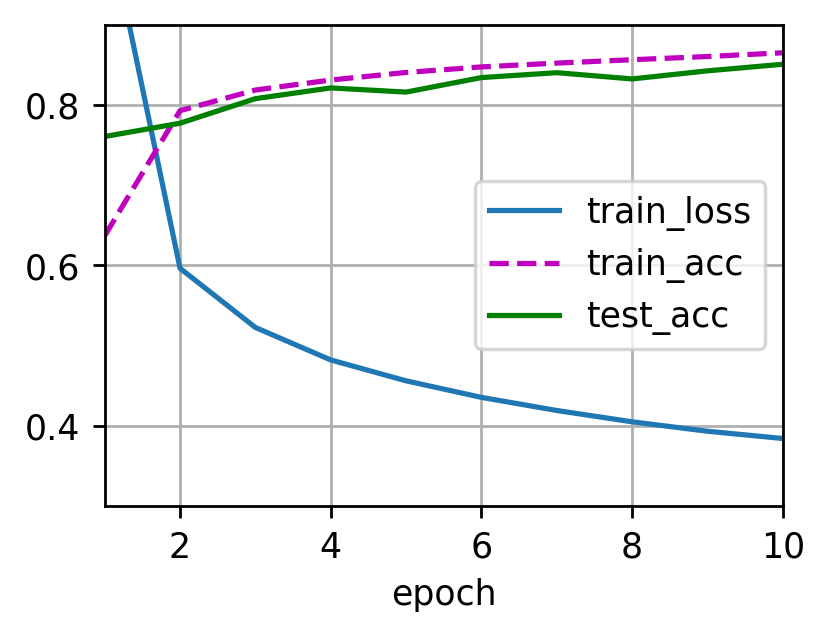

In [22]:
num_epochs, lr = 10, 0.1
updater = torch.optim.SGD(params, lr)
train_ch3(net, train_iter, test_iter, loss, num_epochs, updater)

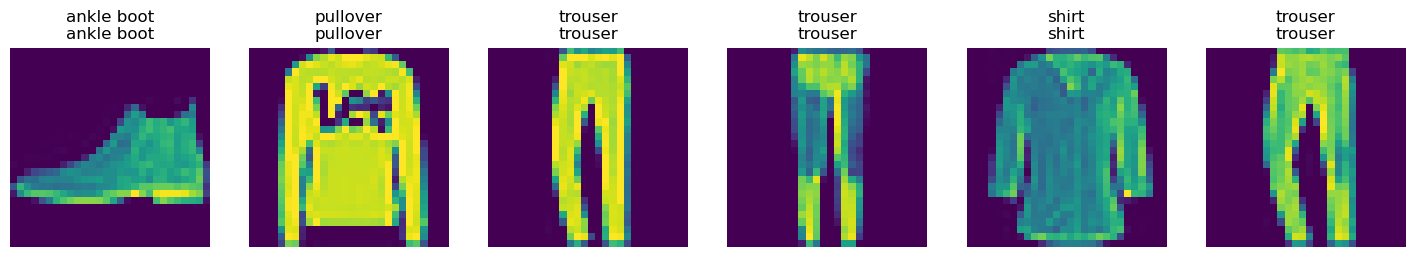

In [23]:
predict_ch3(net, test_iter)